# Pathing, Import libraries, dan Function Plotting

In [ ]:
zip_path = '/content/drive/My\ Drive/BCML/DL/DLCV/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

!rm /content/santa-dataset.zip

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

# Modeling

VGG16, Fine Tuning, FC 2 Hidden Layer(2x2048), 2 Dropout(2x0.5), Batch Normalization, Optimizer SGD

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Dropout

vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,244,3))

for layer in vgg_conv.layers[:]:
  layer.trainable = False

ftmodel = Sequential()
ftmodel.add(vgg_conv)

ftmodel.add(Flatten())
ftmodel.add(Dense(2048, activation='relu', kernel_initializer='he_uniform'))
ftmodel.add(BatchNormalization())
ftmodel.add(Dropout(0.5))
ftmodel.add(Dense(2048, activation='relu', kernel_initializer='he_uniform'))
ftmodel.add(BatchNormalization())
ftmodel.add(Dropout(0.5))
ftmodel.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

ftmodel.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

ftmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              51382272  
_________________________________________________________________
batch_normalization_4 (Batch (None, 2048)              8192      
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_5 (Batch (None, 2048)             

# Image Preprocessing

width_shift_range=0.2, height_shift_range=0.2, brightness_range=[0.5,1.0], zoom_range=0.1, horizontal_flip=True

In [ ]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.2, height_shift_range=0.2, brightness_range=[0.5,1.0], zoom_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'santa-dataset/train'), class_mode='binary', batch_size=128, target_size=(224, 224))
test_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'santa-dataset/test'), class_mode='binary', batch_size=128, target_size=(224, 224))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


# Epoch

In [ ]:
history_base_model = ftmodel.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=40)

Epoch 1/40
6/6 [==============================] - 25s 4s/step - loss: 0.0428 - accuracy: 0.9879 - val_loss: 0.1412 - val_accuracy: 0.9577
Epoch 2/40
6/6 [==============================] - 20s 3s/step - loss: 0.0408 - accuracy: 0.9834 - val_loss: 0.1402 - val_accuracy: 0.9654
Epoch 3/40
6/6 [==============================] - 21s 3s/step - loss: 0.0271 - accuracy: 0.9894 - val_loss: 0.1396 - val_accuracy: 0.9692
Epoch 4/40
6/6 [==============================] - 20s 3s/step - loss: 0.0334 - accuracy: 0.9879 - val_loss: 0.1392 - val_accuracy: 0.9692
Epoch 5/40
6/6 [==============================] - 21s 3s/step - loss: 0.0394 - accuracy: 0.9834 - val_loss: 0.1368 - val_accuracy: 0.9692
Epoch 6/40
6/6 [==============================] - 19s 3s/step - loss: 0.0273 - accuracy: 0.9940 - val_loss: 0.1363 - val_accuracy: 0.9654
Epoch 7/40
6/6 [==============================] - 20s 3s/step - loss: 0.0311 - accuracy: 0.9849 - val_loss: 0.1377 - val_accuracy: 0.9654
Epoch 8/40
6/6 [==================

# Hasil Training dan Plotting

In [ ]:
history_dataframe = pd.DataFrame(history_base_model.history)
history_dataframe['epoch'] = history_base_model.epoch
history_dataframe.sort_values(by = 'val_loss', ascending = True)

,loss,accuracy,val_loss,val_accuracy,epoch
5,0.027286,0.993958,0.136332,0.965385,5
4,0.039437,0.983384,0.136771,0.969231,4
6,0.031080,0.984894,0.137717,0.965385,6
7,0.029538,0.993958,0.138801,0.965385,7
3,0.033386,0.987915,0.139218,0.969231,3
2,0.027146,0.989426,0.139580,0.969231,2
8,0.038873,0.987915,0.139891,0.965385,8
1,0.040799,0.983384,0.140160,0.965385,1
16,0.028194,0.989426,0.140382,0.965385,16
15,0.029675,0.992447,0.140965,0.973077,15


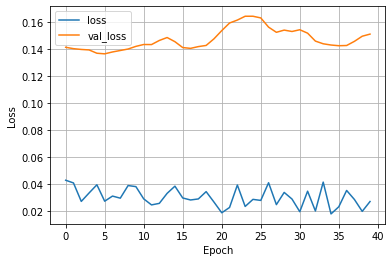

In [ ]:
plot_loss(history_base_model)

Didapatkan Akurasi tertinggi di epoch 14, dimana:

Epoch:14	

Loss:0.038407	

Train Accuracy:0.983384	

Validation Loss:0.145313	

Validation Accuracy:0.97307

Untuk Validation Loss terendah didapatkan pada epoch 5, dimana:

Epoch:5

Loss:0.027286

Train Accuracy:0.993958

Validation Loss:0.136332

Validation Accuracy:0.965385